In [0]:
import math

import numpy as np
import scipy.fftpack

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def dft(xs):
    y = np.zeros(len(xs), dtype=complex)
    for m in range(len(xs)):
        for n in range(len(xs)):
            y[m] += xs[n] * np.exp(-2j * np.pi * m * n / len(xs))
    return y

def idft(ys):
    x = np.zeros(len(ys), dtype=complex)
    for m in range(len(ys)):
        for n in range(len(ys)):
            x[m] += ys[n] * np.exp(2j * np.pi * m * n / len(ys)) / len(ys)
    return x

def fft(xs):
    if len(xs) % 2 == 1:
        return dft(xs)
    first_part = fft(xs[0::2])
    second_part = fft(xs[1::2])
    
    e_n = complex(1, 0)  
    
    res = np.zeros(len(xs), dtype=complex)
    for i in range(len(xs) // 2):
        res[i] = first_part[i] + e_n * second_part[i]
        res[i + len(xs) // 2] = first_part[i] - e_n * second_part[i]
        e_n *= np.exp(-2j * np.pi / len(xs))
        
    return res

def fast_ft(ys):
    if len(ys) % 2 != 0:
        return idft(ys)
    first_part = fast_ft(ys[0::2])
    second_part = fast_ft(ys[1::2])

    e_n = complex(1, 0)  
      
    res = np.zeros(len(ys),dtype=complex)
    for i in range(len(ys) // 2):
        res[i] = first_part[i] + e_n * second_part[i]
        res[i + len(ys) // 2] = first_part[i] - e_n * second_part[i]
        e_n *= np.exp(2j * np.pi / len(ys))
   
    return res

def ifft(ys):
    n = len(ys)
    two_len = 0
    while n % 2 == 0:
        two_len += 1
        n //= 2
   
    return fast_ft(ys)  / 2 ** two_len



In [0]:
#fft(f(xs))

In [0]:
#scipy.fftpack.fft(f(xs))

In [0]:
discretization_size = 100

L = 0.00001
R = 10

xs = np.linspace(L, R, discretization_size)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

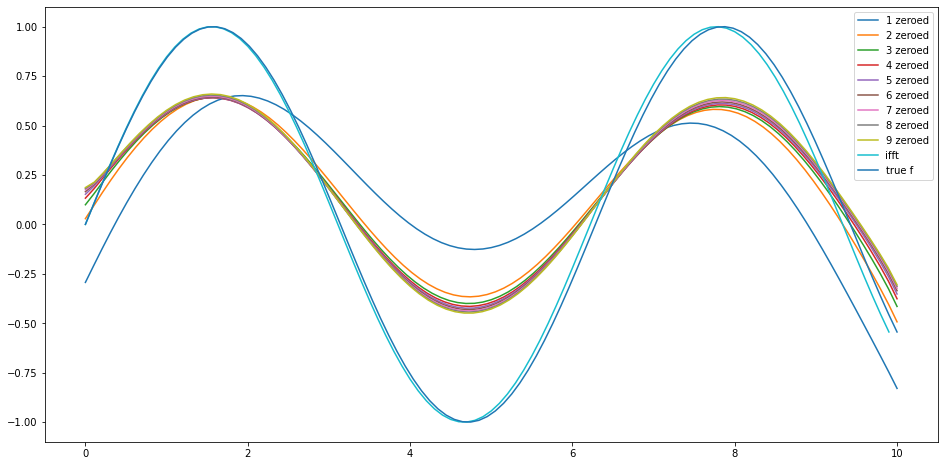

In [6]:
f = lambda x: np.sin(x)

fft_coeffs = fft(f(xs))
# print(fft_coeffs)

plt.figure(figsize=(16, 8))


for zeroed in range(1, 10):
    plt.plot(np.arange(discretization_size - zeroed) / (discretization_size - zeroed - 1) * (R - L),
            ifft(fft_coeffs[:-zeroed]),
            label=f"{zeroed} zeroed")

plt.plot(np.arange(discretization_size) / (discretization_size) * (R - L),
         ifft(fft_coeffs),
         label="ifft")

plt.plot(xs, f(xs),
         label="true f")

plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

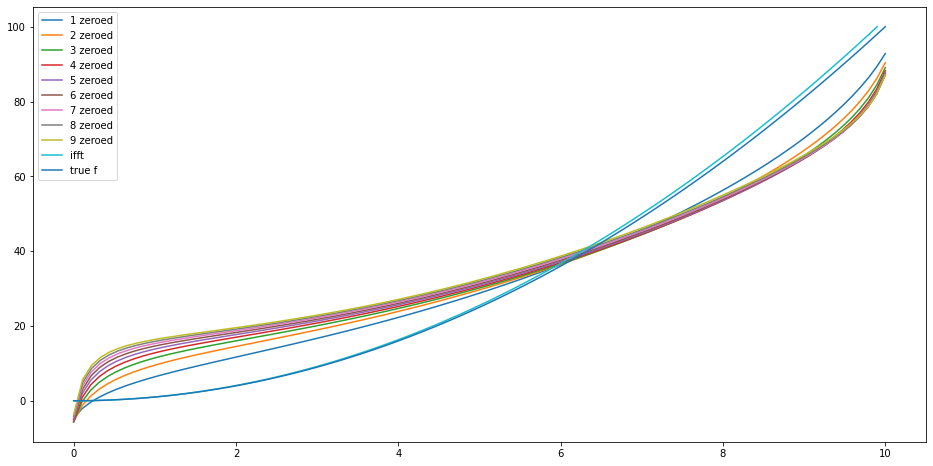

In [7]:
f = lambda x: x**2

fft_coeffs = fft(f(xs))
# print(fft_coeffs)

plt.figure(figsize=(16, 8))


for zeroed in range(1, 10):
    plt.plot(np.arange(discretization_size - zeroed) / (discretization_size - zeroed - 1) * (R - L),
            ifft(fft_coeffs[:-zeroed]),
            label=f"{zeroed} zeroed")

plt.plot(np.arange(discretization_size) / (discretization_size) * (R - L),
         ifft(fft_coeffs),
         label="ifft")

plt.plot(xs, f(xs),
         label="true f")

plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

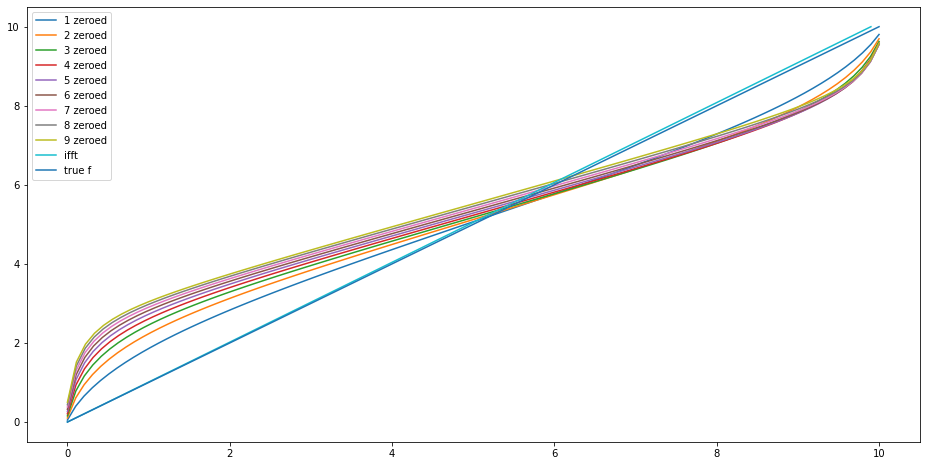

In [8]:
f = lambda x: x

fft_coeffs = fft(f(xs))
# print(fft_coeffs)

plt.figure(figsize=(16, 8))


for zeroed in range(1, 10):
    plt.plot(np.arange(discretization_size - zeroed) / (discretization_size - zeroed - 1) * (R - L),
            ifft(fft_coeffs[:-zeroed]),
            label=f"{zeroed} zeroed")

plt.plot(np.arange(discretization_size) / (discretization_size) * (R - L),
         ifft(fft_coeffs),
         label="ifft")

plt.plot(xs, f(xs),
         label="true f")

plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

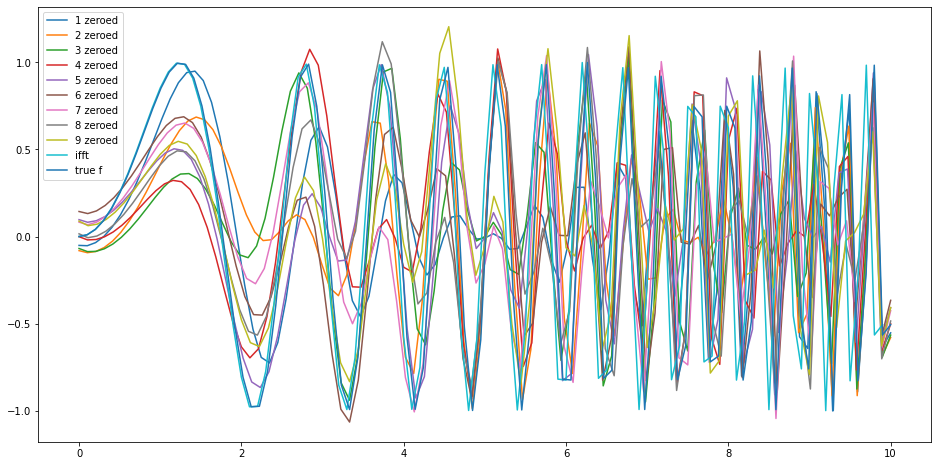

In [9]:
f = lambda x: np.sin(x**2)

fft_coeffs = fft(f(xs))
# print(fft_coeffs)

plt.figure(figsize=(16, 8))


for zeroed in range(1, 10):
    plt.plot(np.arange(discretization_size - zeroed) / (discretization_size - zeroed - 1) * (R - L),
            ifft(fft_coeffs[:-zeroed]),
            label=f"{zeroed} zeroed")

plt.plot(np.arange(discretization_size) / (discretization_size) * (R - L),
         ifft(fft_coeffs),
         label="ifft")

plt.plot(xs, f(xs),
         label="true f")

plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

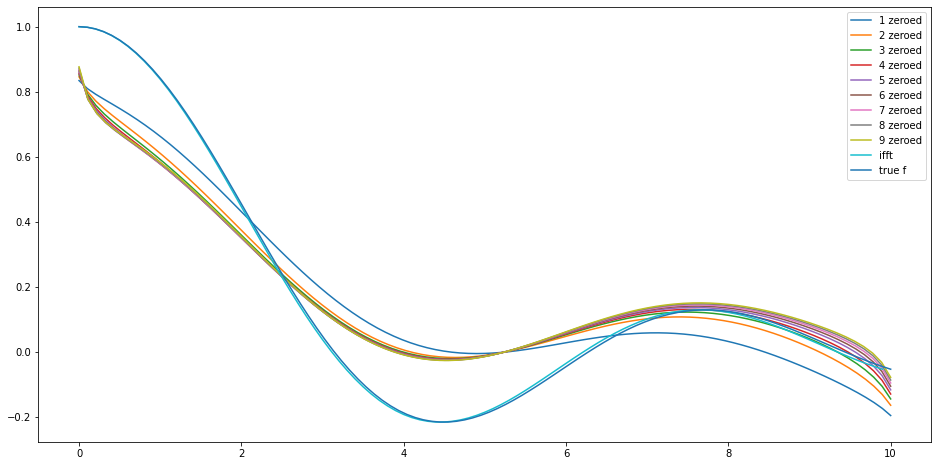

In [10]:
f = lambda x: np.sin(x) / x

fft_coeffs = fft(f(xs))
# print(fft_coeffs)

plt.figure(figsize=(16, 8))


for zeroed in range(1, 10):
    plt.plot(np.arange(discretization_size - zeroed) / (discretization_size - zeroed - 1) * (R - L),
            ifft(fft_coeffs[:-zeroed]),
            label=f"{zeroed} zeroed")

plt.plot(np.arange(discretization_size) / (discretization_size) * (R - L),
         ifft(fft_coeffs),
         label="ifft")

plt.plot(xs, f(xs),
         label="true f")

plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

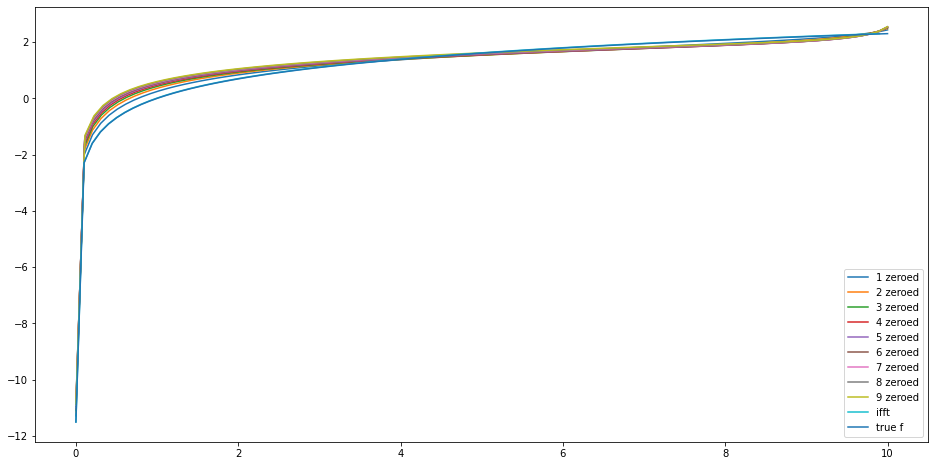

In [11]:
f = lambda x: np.log(x)

fft_coeffs = fft(f(xs))
# print(fft_coeffs)

plt.figure(figsize=(16, 8))


for zeroed in range(1, 10):
    plt.plot(np.arange(discretization_size - zeroed) / (discretization_size - zeroed - 1) * (R - L),
            ifft(fft_coeffs[:-zeroed]),
            label=f"{zeroed} zeroed")

plt.plot(np.arange(discretization_size) / (discretization_size) * (R - L),
         ifft(fft_coeffs),
         label="ifft")

plt.plot(xs, f(xs),
         label="true f")

plt.legend(loc="best")
plt.show()